In [15]:
# example of plotting the adagrad search on a contour plot of the test function
from math import sqrt
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [16]:
def objective(x):
    return x**2.0

def derivative(x):
    return x*2.0

In [28]:
# objective function
def objective(x, y):
	return x**2.0 + y**2.0

# derivative of objective function
def derivative(x, y):
	return asarray([x * 2.0, y * 2.0])

In [29]:
# gradient descent algorithm with adagrad
def adagrad(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions = list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# list of the sum square gradients for each variable
	sq_grad_sums = [0.0 for _ in range(bounds.shape[0])]
	# run the gradient descent
	for it in range(n_iter):
		# calculate gradient
		gradient = derivative(solution[0], solution[1])
		# update the sum of the squared partial derivatives
		for i in range(gradient.shape[0]):
			sq_grad_sums[i] += gradient[i]**2.0
		# build solution
		new_solution = list()
		for i in range(solution.shape[0]):
			# calculate the learning rate for this variable
			alpha = step_size / (1e-8 + sqrt(sq_grad_sums[i]))
			# calculate the new position in this variable
			value = solution[i] - alpha * gradient[i]
			new_solution.append(value)
		# store the new solution
		solution = asarray(new_solution)
		solutions.append(solution)
		# evaluate candidate point
		solution_eval = objective(solution[0], solution[1])
		# report progress
		print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
	return solutions

>0 f([-0.06595599  0.34064899]) = 0.12039
>1 f([-0.02902286  0.27948766]) = 0.07896
>2 f([-0.0129815   0.23463749]) = 0.05522
>3 f([-0.00582483  0.1993997 ]) = 0.03979
>4 f([-0.00261527  0.17071256]) = 0.02915
>5 f([-0.00117437  0.14686138]) = 0.02157
>6 f([-0.00052736  0.12676134]) = 0.01607
>7 f([-0.00023681  0.10966762]) = 0.01203
>8 f([-0.00010634  0.09503809]) = 0.00903
>9 f([-4.77542704e-05  8.24607972e-02]) = 0.00680
>10 f([-2.14444463e-05  7.16123835e-02]) = 0.00513
>11 f([-9.62980437e-06  6.22327049e-02]) = 0.00387
>12 f([-4.32434258e-06  5.41085063e-02]) = 0.00293
>13 f([-1.94188148e-06  4.70624414e-02]) = 0.00221
>14 f([-8.72017797e-07  4.09453989e-02]) = 0.00168
>15 f([-3.91586740e-07  3.56309531e-02]) = 0.00127
>16 f([-1.75845235e-07  3.10112252e-02]) = 0.00096
>17 f([-7.89647442e-08  2.69937139e-02]) = 0.00073
>18 f([-3.54597657e-08  2.34988084e-02]) = 0.00055
>19 f([-1.59234984e-08  2.04577993e-02]) = 0.00042
>20 f([-7.15057749e-09  1.78112581e-02]) = 0.00032
>21 f([-3.2

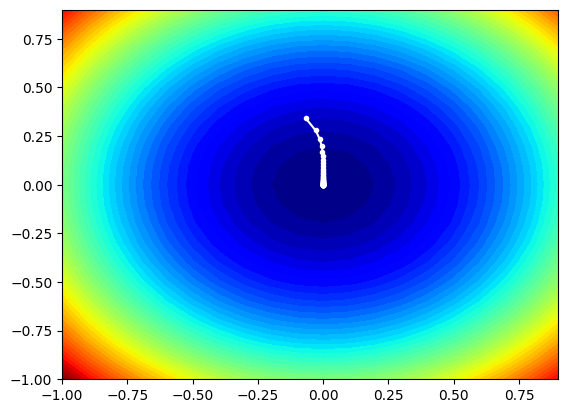

In [30]:
# seed the pseudo random number generator
seed(1)
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions = adagrad(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# show the plot
pyplot.show()